**What is YOLO?**
• YOLO: "You Only Look Once"
• Developed by Joseph Redmon
• This is one of the best algorithms for object detection
• YOLO It's a supremely fast and accurate framework
• It is incredibly fast and can process 45 frames per second
• YOLO is a deep learning model
• Predict obiect classes and location
• it use the whole context of the image to do a prediction

It only need to look once at the image to detect all the object and that is why they chose the name (You Only Look Once) and that is actually the reason why YOLO is a very fast model.
**What is Non-Maximal Suppression (NMS)?**
YOLO uses Non-Maximal Suppression (NMS) to only keeps the best bounding box.

**What are anchor boxes?**
Anchor boxes allow one grid cell to detect multiple objects.



**How does the YOLO Framework Function?**
y= pC , bx , by , bh , bw , c1 , c2 , с3

- *P. defines whether an object is present in the grid or not (it is the probability)
- bx, by, bh, bw specify the bounding box if there is an object
- C1, C2, C3 represent the classes. So, if the object is a car, C2 will be 1 and C1 & C3 will be 0, and so on


**YOLO2 Sources :**

running_yolo:
https://github.com/sankit1/cv-tricks.com/tree/master/OpenCV/Running_YOLO


 yolov2.weights:
https://drive.google.com/file/d/1obd4-7NH-G_ixTwga4HKkpnP78gBcZ9n/view?usp=sharing



In [ ]:
!pip install opencv-python

In [ ]:
import cv2
import argparse
# python yolo0.py --input test.ipg
parser = argparse.ArgumentParser ()
parser.add_argument ('--input', help='Path to input image.')
args = parser.parse_args ()
# Minimum confidence threshold. Increasing this will improv
#but will also reduce detection rate.
min_confidence=0.14
model = 'yolov2.weights'
config = 'yolov2.cfg'
#Load names of classes
classes = None
with open('labels.txt','rt') as f:
    classes = f.read().rstrip('\n').split('\n')
print (classes)
# Load weights and construct graph
net = cv2. dnn. readNetFromDarknet (config, model)
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_DEFAULT)
net. setPreferableTarget (cv2.dnn.DMN_TARGET_CPU)
winName = 'Running YOLO Model'
cv2. namedWindow (winName, cv2.WINDOW_NORMAL)
#Read input image
frame = cv2.imread(args.input)
# "test.jpg"
# Get width and height
height, width, ch=frame. shape
# Create a 4D blob from a frame.
blob = cv2. dnn.blobFromImage(frame, 1.0/255.0, (416, 416), True, crop=False)
net.setInput (blob)
# Run the preprocessed input blog through the network
predictions = net.forward ()
probability_index=5
for i in range(predictions.shape [0]):
    prob_arr= predictions[i][probability_index:]
    class_index=prob_arr.argmax(axis=0)
    confidence= prob_arr [class_index] 
    if confidence > min confidence:
        X_center=predictions [i][0]*width 
        y_center=predictions [i][1]*height 
        width_box=predictions [i][2]*width 
        height_box=predictions [i][3]*height
        x1=int (×_center-width_box * 0.5)
        y1=int (y_center-height_box * 0.5)
        ×2=int(×_center+width_box * 0.5)
        y2=int (y_center+height_box * 0.5)
        cv2.rectangle(frame, (×1, y1), (×2, y2), (255, 255, 255), 1)
        cv2.putText (frame, classes [class_index]+" "+"(0: .1f)".format (confidence),
            (x1,y1), cv2. FONT_HERSHEY_SIMPLEX, 1, (255,255,255),1, cv2. LINE_AA)

# cv2. imwrite("out_"+args. input, frame)
cv2. imshow (winName, frame)
if (cv2.waitkey() >= 0) :
    cv2. destroyAllWindows ()

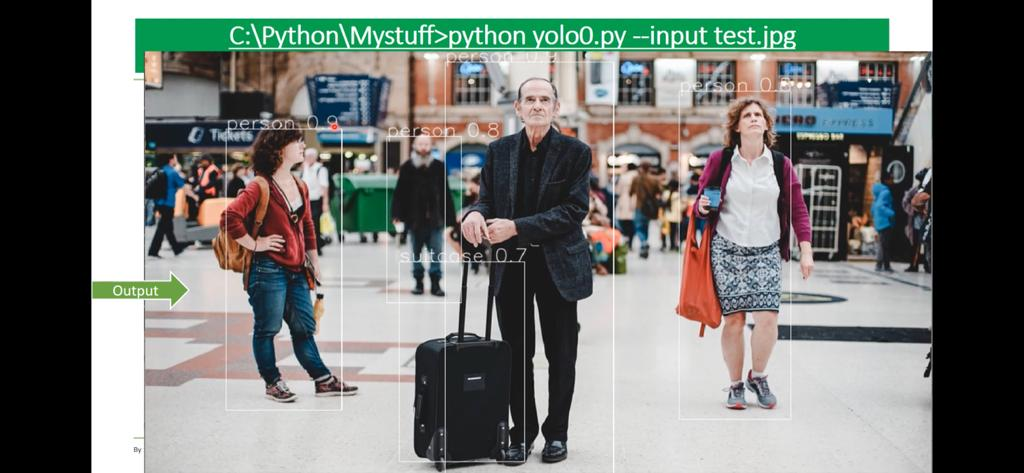

# Yolo3 Sources:
    
**Command Prompt:**
python yolo_opencv.py --image test.jpg --config yolov3.cfg --weights yolov3.weights --classes yolov3. txt


**The script requires four input arguments.**
•input image
•YOLO config file
•pre-trained YOLO weights
•text file containing class names


**yolov3.weights links:**
- https://pjreddie.com/media/files/yolov3.weights
- https://github.com/arunponnusamy/object-detection-opencv

# Yolo3 Detection

In [ ]:
import cv2
import argparse
import numpy as np
# python yolo_opencv.py --image dog.jpg --config yolov3.cfg -weights yolov3.weights - classes volov3.txt
ap = argparse.ArgumentParser ()
ap.add_argument ('-i','--image', required=True, help = 'path to input image')
ap.add_argument('-c','--config', required=True, help = 'path to yolo config file')
ap.add_argument('-w','--weights' , required=True,help = 'path to yolo pre-trained weights')
ap.add_argument('-c1','--classes', required=True, help = 'path to text file containing class names')
args = ap.parse_args ()
# Returns indexes of layers with unconnected outputs.
def get output_layers(net):
    layer_names = net. getLayerNames ()
    output_layers = [layer_names [i[0] - 1] for i in net. getUnconnectedOutLayers ()
    return output layers
                     
def draw_prediction (img, class_id, confidence, x, y, X_plus_W, y_plus_h):
    label = str(classes [class_id])
    color = COLORS [class_id]
    cv2.rectangle(img, (x,y), (×_plus_W,y_plus_h), color, 2)
    cv2.putText(img, label, (x-10,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
image = cv2. imread (args.image)
Width = image. shape [1]
Height = image.shape[0]
scale = 0.00392
classes = None
with open(args. classes,'r') as f:
                     classes = [line.strip() for line in f.readlines ()]

                     
COLORS = np.random.uniform(0, 255, size=(len (classes), 3))
net = cv2.dnn.readNet (args.weights, args.config)
blob = cv2.dnn.blobFromImage (image, scale, (416,416), (0,0,0), True, crop=False)
net.setInput (blob)
outs = net.forward(get_output_layers (net))                     
                     
class ids = []
confidences = []
boxes = []
conf threshold = 0.5
nms_threshold = 0.4
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores [class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * Width)
            center_y = int (detection [1]* Height)
            w = int (detection [2] * Width)
            h = int (detection [3]* Height)
            X = center_ x - W / 2
            y = center_y - h / 2
            class_ids.append(class_id)
            confidences.append(float (confidence))
            boxes.append([x, y, w, h])
indices = cv2.dnn. NMSBoxes (boxes, confidences, conf_threshold, ms_threshold)
for i in indices:
    i= i[0]
    box = boxes [i]   
    X = box[0]
    y = box [1] 
    W = box [2]
    h = box[3]                 
    draw_prediction(image, class_ids[i], confidences[i], round(x), round(y),round (x+w), round(y+h))
# Performs non maximum suppression given boxes and corresponding scores.
cv2. imshow("object detection", image)
cv2.waitKey ()           
cv2.imwrite("object-detection.jpg", image)       
cv2.destrovAllWindows ()     
                     
# in command prompt                     
python yolo_opencv.py --image dog.jpg --config yolov3.cfg --weights yolov3.weights --classes yolov3.txt


# Read from YouTube or Video

In [ ]:
import cv2
import pafy
import numpy as np
#url of the video to predict Age and gender
url = 'https: //www.youtube.com/watch?v=¡H1ZJVqJ03Y'
vPafy = pafy.new(url)
play = VPafy-getbest (preftype="mp4")
cap = cv2. VideoCapture (play.url) #cap = cv2. VideoCapture ( "obama.mp4")
cap.set (3, 480) #set width of the frame
cap.set (4, 640) #set height of the frame
classesf = "yolov3.txt"
weights="yolov3.weights"
config= "yolov3.cfg"
scale = 0.00392
classes = None
with open(classesf, 'r') as f:
    classes = [line.strip() for line in f.readlines ()]
COLORS = np.random. uniform(0, 255, size=(len (classes), 3))
net = cv2.dnn. readNet (weights, config)
def get_output_layers(net):
    layer_names = net.getLayerNames ()
    output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers ()]
    return output_layers

def draw_prediction(img, class_id, confidence, x, y, ×_plus _w, y_plus_h):
    label = str(classes [class id])
    color = COLORS [class_id]
    cv2. rectangle(img, (x,y), (×_plus_W,y_plus_h), color, 2)
    cv2.putText (img, label, (×-10, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

def video_detector() :
#font = cv2. FONT_HERSHEY_SIMPLEX
    while True:
        ret, image = cap.read()
        width = image.shape [1]
        Height = image.shape [0]
        blob = cv2.dnn. blobFromImage (image, scale, (416,416), (0,0,0), True, crop=False)
        net.setInput (blob)
        outs = net. forward(get_output_layers (net))
        class_ids = []
        confidences = []
        boxes =[]
        conf_threshold = 0.5
        nms_threshold = 0.4
        for out in outs:
            for detection in out:
                scores = detection [5:]
                class_id = np.argmax (scores)
                confidence = scores [class_id]
                if confidence > 0.5:
                    center x = int(detection[0] * Width)
                    center_y = int(detection [1] * Height)
                    w = int (detection [2] * Width)
                    h = in(detection [3] * Height)
                    X = center_x - W / 2
                    y = center y - h / 2
                    class_ids.append(class_id)
                    confidences. append (float (confidence))
                    boxes.append ([x, y, W, h])
        indices = cv2.dnn. NMSBoxes (boxes, confidences, conf_threshold, ms_threshold)
        for i in indices:  
            i = i[0]
            box = boxes [i]
            X = box [0]
            y = box[1]
            w = box [2]
            h = box [3]
            draw_prediction(image, class_ids[i], confidences [i], round(x), round(y), round (X+W), round (y+h))
        cv2.imshow("object detection", image) 
        if cv2.waitKey (1) & 0xFF == ord('g'):
            break
    
    
if __name__=="__main__":
    video_detector ()


# REFRENCES:

https://medium.com/@amrokamal_47691/volo-yolov2-and-volov3-all-you-want-to-know-73e92dc4899

https://blog.emmanuelcaradec.com/humble-volo-implementation-in-keras/

https://towardsdatascience.com/you-only-look-once-yolo-implementing-yolo-in-less-than-30-lines-of-python-code-97f9835bfd2

https://www.analyticsvidhya.com/blog/2018/12/practical-guide-object-detection-yolo-framewor-python/

https://github.com/sankit1/cv-tricks.com/tree/master/OpenCV/Running_YOLO

https://github.com/arunponnusamy/object-detection-opencv

https://www.arunponnusamy.com/volo-object-detection-opencv-python.html
